# Test `totalsegmentator` usage / evaluation

**Requires SimpleITK <= 2.1.0, working with 2.0.2**

## Predictions on dataset

In [2]:
import os
import torch
import shutil
import subprocess

from tqdm import tqdm
from totalsegmentator.python_api import totalsegmentator

from datasets import get_dataset

os.environ['CUDA_VISIBLE_DEVICES'] = ''

dataset   = get_dataset('total_segmentator')

keep_mask = dataset['segmentation'].apply(lambda f: f.endswith('.npz'))
dataset   = dataset[keep_mask]

use_cpu = False
models  = ['totalsegmentator_lowres', 'totalsegmentator_fullres']

for model in models:
    for _, row in tqdm(dataset.iterrows(), total = len(dataset)):
        subj_id     = row['images'].split('/')[-2]
        output_file = os.path.join('evaluations', model, 'segmentations', subj_id + '.nii.gz')
        if not os.path.exists(output_file):
            if not use_cpu:
                tar_file = '/storage/Totalsegmentator_dataset/{}/{}_seg.nii.gz'.format(subj_id, model)
                
                subprocess.run([
                    'docker', 'run', '--gpus', "device=0", '--ipc=host', '-v',
                    '/storage/Totalsegmentator_dataset/{}:/tmp'.format(subj_id),
                    'totalsegmentator', 'TotalSegmentator', '-i', '/tmp/ct.nii.gz',
                    '-o', '/tmp/{}_seg.nii.gz'.format(model), '-ml'
                ])
                if os.path.exists(tar_file):
                    shutil.move(tar_file, output_file)
            
            if not os.path.exists(output_file):
                print('[RUNNING ON CPU]')
                res = totalsegmentator(
                    row['images'],
                    output  = output_file,
                    ml      = True,
                    fast    = True if 'lowres' in model else False,
                    verbose = False,
                    quiet   = True
                )
print(res)

2023-06-06 11:41:39.915820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 11:41:40.036299: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 11:41:40.060906: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. E

Loading dataset total_segmentator...


 76%|███████████████████████████████████████████████████████████▌                  | 918/1202 [00:00<00:00, 1788.67it/s]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 76%|███████████████████████████████████████████████████████████▌                  | 918/1202 [00:19<00:00, 1788.67it/s]


If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 16.00s
Predicting part 1 of 5 ...


Traceback (most recent call last):
  File "/opt/conda/bin/TotalSegmentator", line 103, in <module>
    main()
  File "/opt/conda/bin/TotalSegmentator", line 99, in main
    args.force_split, args.output_type, args.quiet, args.verbose, args.test)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/python_api.py", line 208, in totalsegmentator
    quiet=quiet, verbose=verbose, test=test)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/nnunet.py", line 270, in nnUNet_predict_image
    nr_threads_resampling, nr_threads_saving)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/nnunet.py", line 120, in nnUNet_predict
    step_size=step_size, checkpoint_name=chk)
  File "/opt/conda/lib/python3.6/site-packages/nnunet/inference/predict.py", line 671, in predict_from_folder
    step_size=step_size, checkpoint_name=checkpoint_name)
  File "/opt/conda/lib/python3.6/site-packages/nnunet/inference/predict.py", line 498, in predict_cases_fastest
    mixed_pre


If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 16.00s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
[RUNNING ON CPU]
No GPU detected. Running on CPU. This can be very slow. The '--fast' option can help to some extend.
Predicting part 1 of 5 ...


/etinfo/users2/qlanglois/.local/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
/etinfo/users2/qlanglois/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...
Predicting part 5 of 5 ...


 83%|██████████████████████████████████████████████████████████████████▏             | 994/1202 [20:43<09:57,  2.87s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|██████████████████████████████████████████████████████████████████▏             | 995/1202 [21:34<10:27,  3.03s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|██████████████████████████████████████████████████████████████████▎             | 996/1202 [22:17<11:02,  3.22s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|██████████████████████████████████████████████████████████████████▎             | 997/1202 [23:44<12:53,  3.77s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|██████████████████████████████████████████████████████████████████▍             | 998/1202 [24:49<14:47,  4.35s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|██████████████████████████████████████████████████████████████████▍             | 999/1202 [25:30<16:21,  4.83s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|█████████████████████████████████████████████████████████████████▋             | 1000/1202 [26:55<21:18,  6.33s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|█████████████████████████████████████████████████████████████████▊             | 1001/1202 [27:16<22:25,  6.69s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|█████████████████████████████████████████████████████████████████▊             | 1002/1202 [28:35<30:54,  9.27s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 83%|█████████████████████████████████████████████████████████████████▉             | 1003/1202 [29:31<38:18, 11.55s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▎            | 1004/1202 [32:00<1:07:27, 20.44s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▍            | 1005/1202 [32:29<1:09:26, 21.15s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▍            | 1006/1202 [33:02<1:13:14, 22.42s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▌            | 1007/1202 [33:29<1:14:42, 22.99s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▌            | 1008/1202 [35:32<2:06:10, 39.02s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▋            | 1009/1202 [36:08<2:03:55, 38.52s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▋            | 1010/1202 [36:59<2:11:52, 41.21s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▊            | 1011/1202 [37:36<2:07:48, 40.15s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▊            | 1012/1202 [38:04<1:57:23, 37.07s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▉            | 1013/1202 [39:01<2:13:08, 42.27s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|████████████████████████████████████████████████████████████████▉            | 1014/1202 [39:53<2:20:57, 44.99s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 84%|█████████████████████████████████████████████████████████████████            | 1015/1202 [41:22<2:58:54, 57.40s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████            | 1016/1202 [43:44<4:12:58, 81.61s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▏           | 1017/1202 [46:09<5:07:51, 99.84s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▏           | 1018/1202 [46:35<4:00:02, 78.27s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▎           | 1019/1202 [47:16<3:25:13, 67.29s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▎           | 1020/1202 [47:40<2:45:06, 54.43s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▍           | 1021/1202 [48:23<2:33:40, 50.94s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▍           | 1022/1202 [49:25<2:43:17, 54.43s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▌           | 1023/1202 [49:53<2:18:33, 46.44s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▌           | 1024/1202 [50:16<1:57:08, 39.49s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▋           | 1025/1202 [50:45<1:46:41, 36.17s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▋           | 1026/1202 [52:15<2:33:32, 52.35s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 85%|█████████████████████████████████████████████████████████████████▊           | 1027/1202 [52:52<2:19:40, 47.89s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|█████████████████████████████████████████████████████████████████▊           | 1028/1202 [55:14<3:40:00, 75.87s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|█████████████████████████████████████████████████████████████████▉           | 1029/1202 [55:31<2:48:29, 58.43s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|█████████████████████████████████████████████████████████████████▉           | 1030/1202 [56:32<2:49:31, 59.14s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|██████████████████████████████████████████████████████████████████           | 1031/1202 [58:16<3:27:11, 72.70s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|██████████████████████████████████████████████████████████████████           | 1032/1202 [58:54<2:55:58, 62.11s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▍          | 1033/1202 [1:00:09<3:06:17, 66.14s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▌          | 1034/1202 [1:00:37<2:32:41, 54.54s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▌          | 1035/1202 [1:01:01<2:06:07, 45.31s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▋          | 1036/1202 [1:02:07<2:22:45, 51.60s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▋          | 1037/1202 [1:02:32<2:00:23, 43.78s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▊          | 1038/1202 [1:03:34<2:14:38, 49.26s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 86%|████████████████████████████████████████████████████████████████▊          | 1039/1202 [1:04:46<2:32:09, 56.01s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|████████████████████████████████████████████████████████████████▉          | 1040/1202 [1:05:10<2:05:11, 46.37s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|████████████████████████████████████████████████████████████████▉          | 1041/1202 [1:05:43<1:53:35, 42.33s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████          | 1042/1202 [1:06:30<1:56:27, 43.67s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████          | 1043/1202 [1:06:50<1:36:53, 36.56s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▏         | 1044/1202 [1:08:59<2:49:18, 64.30s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▏         | 1045/1202 [1:09:25<2:18:17, 52.85s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▎         | 1046/1202 [1:10:57<2:48:07, 64.66s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▎         | 1047/1202 [1:12:26<3:05:35, 71.84s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▍         | 1048/1202 [1:12:48<2:26:32, 57.09s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▍         | 1049/1202 [1:13:07<1:56:02, 45.51s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▌         | 1050/1202 [1:13:46<1:50:37, 43.67s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 87%|█████████████████████████████████████████████████████████████████▌         | 1051/1202 [1:14:02<1:29:08, 35.42s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|█████████████████████████████████████████████████████████████████▋         | 1052/1202 [1:14:42<1:31:39, 36.67s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|█████████████████████████████████████████████████████████████████▋         | 1053/1202 [1:15:31<1:40:03, 40.29s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|█████████████████████████████████████████████████████████████████▊         | 1054/1202 [1:15:56<1:28:11, 35.75s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|█████████████████████████████████████████████████████████████████▊         | 1055/1202 [1:16:12<1:13:02, 29.82s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|█████████████████████████████████████████████████████████████████▉         | 1056/1202 [1:17:51<2:03:03, 50.57s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|█████████████████████████████████████████████████████████████████▉         | 1057/1202 [1:18:08<1:38:14, 40.65s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|██████████████████████████████████████████████████████████████████         | 1058/1202 [1:19:03<1:47:41, 44.87s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|██████████████████████████████████████████████████████████████████         | 1059/1202 [1:20:39<2:23:38, 60.27s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|██████████████████████████████████████████████████████████████████▏        | 1060/1202 [1:21:50<2:30:21, 63.53s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|██████████████████████████████████████████████████████████████████▏        | 1061/1202 [1:22:55<2:30:00, 63.84s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|██████████████████████████████████████████████████████████████████▎        | 1062/1202 [1:24:07<2:34:27, 66.20s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 88%|██████████████████████████████████████████████████████████████████▎        | 1063/1202 [1:25:01<2:24:48, 62.51s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▍        | 1064/1202 [1:25:19<1:53:25, 49.32s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▍        | 1065/1202 [1:26:04<1:49:45, 48.07s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|█████████████████████████████████████████████████████████████████▋        | 1066/1202 [1:29:48<3:48:14, 100.69s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▌        | 1067/1202 [1:30:24<3:03:03, 81.36s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▋        | 1068/1202 [1:31:09<2:37:28, 70.51s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▋        | 1069/1202 [1:31:34<2:05:55, 56.81s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▊        | 1070/1202 [1:32:04<1:46:54, 48.60s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▊        | 1071/1202 [1:33:04<1:53:46, 52.11s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▉        | 1072/1202 [1:35:32<2:55:01, 80.78s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|██████████████████████████████████████████████████████████████████▉        | 1073/1202 [1:36:11<2:26:51, 68.30s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|███████████████████████████████████████████████████████████████████        | 1074/1202 [1:36:51<2:07:38, 59.83s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 89%|███████████████████████████████████████████████████████████████████        | 1075/1202 [1:38:09<2:18:10, 65.28s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▏       | 1076/1202 [1:38:40<1:55:26, 54.97s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▏       | 1077/1202 [1:39:10<1:39:03, 47.55s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▎       | 1078/1202 [1:39:47<1:31:35, 44.32s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▎       | 1079/1202 [1:40:34<1:32:33, 45.15s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▍       | 1080/1202 [1:42:09<2:02:18, 60.15s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▍       | 1081/1202 [1:43:10<2:02:06, 60.55s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▌       | 1082/1202 [1:43:55<1:51:12, 55.61s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▌       | 1083/1202 [1:45:10<2:02:20, 61.69s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▋       | 1084/1202 [1:46:42<2:19:00, 70.68s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▋       | 1085/1202 [1:47:44<2:12:51, 68.13s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▊       | 1086/1202 [1:49:35<2:36:17, 80.84s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 90%|███████████████████████████████████████████████████████████████████▊       | 1087/1202 [1:50:37<2:24:06, 75.19s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|██████████████████████████████████████████████████████████████████▉       | 1088/1202 [1:53:18<3:11:54, 101.01s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|███████████████████████████████████████████████████████████████████▉       | 1089/1202 [1:54:02<2:37:56, 83.87s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████       | 1090/1202 [1:55:07<2:26:11, 78.32s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████       | 1091/1202 [1:55:51<2:05:54, 68.06s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▏      | 1092/1202 [1:57:16<2:13:48, 72.99s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▏      | 1093/1202 [1:57:52<1:52:41, 62.04s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▎      | 1094/1202 [1:58:49<1:48:55, 60.52s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▎      | 1095/1202 [1:59:33<1:38:56, 55.48s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▍      | 1096/1202 [2:01:11<2:00:27, 68.19s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▍      | 1097/1202 [2:02:44<2:12:27, 75.69s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▌      | 1098/1202 [2:03:36<1:58:47, 68.53s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 91%|████████████████████████████████████████████████████████████████████▌      | 1099/1202 [2:04:13<1:41:25, 59.08s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|████████████████████████████████████████████████████████████████████▋      | 1100/1202 [2:04:35<1:21:20, 47.85s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|████████████████████████████████████████████████████████████████████▋      | 1101/1202 [2:05:46<1:32:32, 54.98s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|████████████████████████████████████████████████████████████████████▊      | 1102/1202 [2:07:42<2:02:06, 73.26s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|████████████████████████████████████████████████████████████████████▊      | 1103/1202 [2:09:45<2:25:29, 88.17s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|████████████████████████████████████████████████████████████████████▉      | 1104/1202 [2:10:47<2:11:02, 80.23s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|████████████████████████████████████████████████████████████████████▉      | 1105/1202 [2:13:05<2:37:56, 97.69s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|█████████████████████████████████████████████████████████████████████      | 1106/1202 [2:13:33<2:02:43, 76.70s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|█████████████████████████████████████████████████████████████████████      | 1107/1202 [2:14:23<1:48:46, 68.70s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|█████████████████████████████████████████████████████████████████████▏     | 1108/1202 [2:16:37<2:18:09, 88.19s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|█████████████████████████████████████████████████████████████████████▏     | 1109/1202 [2:17:38<2:04:08, 80.09s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|█████████████████████████████████████████████████████████████████████▎     | 1110/1202 [2:18:04<1:38:14, 64.07s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 92%|█████████████████████████████████████████████████████████████████████▎     | 1111/1202 [2:19:58<1:59:50, 79.02s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|█████████████████████████████████████████████████████████████████████▍     | 1112/1202 [2:20:36<1:39:45, 66.50s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|█████████████████████████████████████████████████████████████████████▍     | 1113/1202 [2:21:16<1:26:57, 58.62s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

Traceback (most recent call last):
  File "/opt/conda/bin/TotalSegmentator", line 103, in <module>
    main()
  File "/opt/conda/bin/TotalSegmentator", line 99, in main
    args.force_split, args.output_type, args.quiet, args.verbose, args.test)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/python_api.py", line 208, in totalsegmentator
    quiet=quiet, verbose=verbose, test=test)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/nnunet.py", line 270, in nnUNet_predict_image
    nr_threads_resampling, nr_threads_saving)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/nnunet.py", line 120, in nnUNet_predict
    step_size=step_size, checkpoint_name=chk)
  File "/opt/conda/lib/python3.6/site-packages/nnunet/inference/predict.py", line 671, in predict_from_folder
    step_size=step_size, checkpoint_name=checkpoint_name)
  File "/opt/conda/lib/python3.6/site-packages/nnunet/inference/predict.py", line 498, in predict_cases_fastest
    mixed_pre


If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 12.88s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
[RUNNING ON CPU]
No GPU detected. Running on CPU. This can be very slow. The '--fast' option can help to some extend.
Predicting part 1 of 5 ...


/etinfo/users2/qlanglois/.local/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
/etinfo/users2/qlanglois/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...
Predicting part 5 of 5 ...


 93%|███████████████████████████████████████████████████████████████████▋     | 1114/1202 [2:47:16<12:26:50, 509.21s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|████████████████████████████████████████████████████████████████████▋     | 1115/1202 [2:47:33<8:44:12, 361.53s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|████████████████████████████████████████████████████████████████████▋     | 1116/1202 [2:49:19<6:48:13, 284.80s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|████████████████████████████████████████████████████████████████████▊     | 1117/1202 [2:50:05<5:01:50, 213.06s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|████████████████████████████████████████████████████████████████████▊     | 1118/1202 [2:50:36<3:41:42, 158.36s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|████████████████████████████████████████████████████████████████████▉     | 1119/1202 [2:51:17<2:50:31, 123.27s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|████████████████████████████████████████████████████████████████████▉     | 1120/1202 [2:52:03<2:16:51, 100.14s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|█████████████████████████████████████████████████████████████████████▉     | 1121/1202 [2:52:40<1:49:27, 81.08s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|██████████████████████████████████████████████████████████████████████     | 1122/1202 [2:53:51<1:44:21, 78.27s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 93%|██████████████████████████████████████████████████████████████████████     | 1123/1202 [2:54:25<1:25:20, 64.82s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▏    | 1124/1202 [2:55:28<1:23:32, 64.26s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▏    | 1125/1202 [2:55:48<1:05:34, 51.10s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▎    | 1126/1202 [2:56:33<1:02:17, 49.18s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|████████████████████████████████████████████████████████████████████████▏    | 1127/1202 [2:57:12<57:47, 46.23s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▍    | 1128/1202 [3:00:03<1:43:08, 83.63s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▍    | 1129/1202 [3:00:30<1:20:51, 66.46s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▌    | 1130/1202 [3:01:15<1:12:03, 60.05s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▌    | 1131/1202 [3:02:15<1:11:00, 60.00s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|██████████████████████████████████████████████████████████████████████▋    | 1132/1202 [3:03:26<1:13:52, 63.32s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|████████████████████████████████████████████████████████████████████████▌    | 1133/1202 [3:03:48<58:44, 51.08s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|████████████████████████████████████████████████████████████████████████▋    | 1134/1202 [3:04:08<47:05, 41.56s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 94%|████████████████████████████████████████████████████████████████████████▋    | 1135/1202 [3:04:44<44:49, 40.14s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|████████████████████████████████████████████████████████████████████████▊    | 1136/1202 [3:05:10<39:15, 35.69s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|████████████████████████████████████████████████████████████████████████▊    | 1137/1202 [3:05:34<34:58, 32.29s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|███████████████████████████████████████████████████████████████████████    | 1138/1202 [3:07:30<1:01:14, 57.41s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|████████████████████████████████████████████████████████████████████████▉    | 1139/1202 [3:08:22<58:42, 55.91s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|███████████████████████████████████████████████████████████████████████▏   | 1140/1202 [3:09:37<1:03:33, 61.51s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|█████████████████████████████████████████████████████████████████████████    | 1141/1202 [3:10:29<59:45, 58.77s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|███████████████████████████████████████████████████████████████████████▎   | 1142/1202 [3:12:51<1:23:33, 83.56s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|██████████████████████████████████████████████████████████████████████▎   | 1143/1202 [3:15:20<1:41:39, 103.39s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|██████████████████████████████████████████████████████████████████████▍   | 1144/1202 [3:17:20<1:44:41, 108.30s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|███████████████████████████████████████████████████████████████████████▍   | 1145/1202 [3:17:46<1:19:14, 83.41s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|███████████████████████████████████████████████████████████████████████▌   | 1146/1202 [3:18:05<1:00:02, 64.33s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 95%|█████████████████████████████████████████████████████████████████████████▍   | 1147/1202 [3:18:39<50:27, 55.05s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▌   | 1148/1202 [3:19:18<45:17, 50.32s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▌   | 1149/1202 [3:19:40<37:01, 41.91s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▋   | 1150/1202 [3:19:59<30:18, 34.98s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▋   | 1151/1202 [3:21:30<43:58, 51.73s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▊   | 1152/1202 [3:21:59<37:27, 44.96s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▊   | 1153/1202 [3:22:36<34:42, 42.50s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▉   | 1154/1202 [3:22:59<29:19, 36.66s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|█████████████████████████████████████████████████████████████████████████▉   | 1155/1202 [3:23:32<27:55, 35.64s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|██████████████████████████████████████████████████████████████████████████   | 1156/1202 [3:24:23<30:50, 40.23s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|██████████████████████████████████████████████████████████████████████████   | 1157/1202 [3:25:52<41:07, 54.82s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|██████████████████████████████████████████████████████████████████████████▏  | 1158/1202 [3:27:41<52:05, 71.03s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 96%|██████████████████████████████████████████████████████████████████████████▏  | 1159/1202 [3:28:16<43:14, 60.33s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▎  | 1160/1202 [3:29:00<38:51, 55.52s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▎  | 1161/1202 [3:30:29<44:41, 65.40s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▍  | 1162/1202 [3:32:01<48:52, 73.32s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▌  | 1163/1202 [3:33:56<55:50, 85.91s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▌  | 1164/1202 [3:34:38<46:09, 72.88s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▋  | 1165/1202 [3:34:56<34:40, 56.24s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▋  | 1166/1202 [3:37:05<46:56, 78.23s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▊  | 1167/1202 [3:38:26<46:00, 78.87s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▊  | 1168/1202 [3:39:09<38:33, 68.03s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▉  | 1169/1202 [3:40:38<40:57, 74.48s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████▉  | 1170/1202 [3:42:58<50:14, 94.19s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 97%|██████████████████████████████████████████████████████████████████████████  | 1171/1202 [3:45:15<55:16, 106.98s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|███████████████████████████████████████████████████████████████████████████  | 1172/1202 [3:45:52<42:58, 85.94s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|███████████████████████████████████████████████████████████████████████████▏ | 1173/1202 [3:46:46<36:54, 76.37s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|███████████████████████████████████████████████████████████████████████████▏ | 1174/1202 [3:47:04<27:28, 58.87s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|███████████████████████████████████████████████████████████████████████████▎ | 1175/1202 [3:47:46<24:16, 53.94s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

Traceback (most recent call last):
  File "/opt/conda/bin/TotalSegmentator", line 103, in <module>
    main()
  File "/opt/conda/bin/TotalSegmentator", line 99, in main
    args.force_split, args.output_type, args.quiet, args.verbose, args.test)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/python_api.py", line 208, in totalsegmentator
    quiet=quiet, verbose=verbose, test=test)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/nnunet.py", line 270, in nnUNet_predict_image
    nr_threads_resampling, nr_threads_saving)
  File "/opt/conda/lib/python3.6/site-packages/totalsegmentator/nnunet.py", line 120, in nnUNet_predict
    step_size=step_size, checkpoint_name=chk)
  File "/opt/conda/lib/python3.6/site-packages/nnunet/inference/predict.py", line 671, in predict_from_folder
    step_size=step_size, checkpoint_name=checkpoint_name)
  File "/opt/conda/lib/python3.6/site-packages/nnunet/inference/predict.py", line 498, in predict_cases_fastest
    mixed_pre


If you use this tool please cite: https://doi.org/10.48550/arXiv.2208.05868

Resampling...
  Resampled in 15.23s
Predicting part 1 of 5 ...
Predicting part 2 of 5 ...
[RUNNING ON CPU]
No GPU detected. Running on CPU. This can be very slow. The '--fast' option can help to some extend.
Predicting part 1 of 5 ...


/etinfo/users2/qlanglois/.local/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")
/etinfo/users2/qlanglois/.local/lib/python3.9/site-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Predicting part 2 of 5 ...
Predicting part 3 of 5 ...
Predicting part 4 of 5 ...
Predicting part 5 of 5 ...


 98%|████████████████████████████████████████████████████████████████████████▍ | 1176/1202 [4:10:54<3:16:41, 453.89s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|████████████████████████████████████████████████████████████████████████▍ | 1177/1202 [4:11:37<2:17:52, 330.89s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|████████████████████████████████████████████████████████████████████████▌ | 1178/1202 [4:12:11<1:36:39, 241.63s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|████████████████████████████████████████████████████████████████████████▌ | 1179/1202 [4:12:37<1:07:49, 176.93s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|██████████████████████████████████████████████████████████████████████████▌ | 1180/1202 [4:13:02<48:13, 131.52s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|██████████████████████████████████████████████████████████████████████████▋ | 1181/1202 [4:14:30<41:25, 118.37s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|███████████████████████████████████████████████████████████████████████████▋ | 1182/1202 [4:15:24<32:58, 98.94s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 98%|███████████████████████████████████████████████████████████████████████████▊ | 1183/1202 [4:15:43<23:49, 75.22s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|███████████████████████████████████████████████████████████████████████████▊ | 1184/1202 [4:16:13<18:29, 61.63s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|███████████████████████████████████████████████████████████████████████████▉ | 1185/1202 [4:17:31<18:50, 66.52s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|███████████████████████████████████████████████████████████████████████████▉ | 1186/1202 [4:18:05<15:05, 56.57s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████ | 1187/1202 [4:18:48<13:08, 52.54s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|███████████████████████████████████████████████████████████████████████████ | 1188/1202 [4:22:19<23:22, 100.19s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▏| 1189/1202 [4:23:29<19:42, 90.97s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▏| 1190/1202 [4:24:06<14:57, 74.79s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▎| 1191/1202 [4:26:06<16:13, 88.52s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▎| 1192/1202 [4:26:50<12:30, 75.06s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▍| 1193/1202 [4:27:15<09:01, 60.12s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▍| 1194/1202 [4:27:37<06:28, 48.59s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

 99%|████████████████████████████████████████████████████████████████████████████▌| 1195/1202 [4:28:17<05:21, 45.98s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|████████████████████████████████████████████████████████████████████████████▌| 1196/1202 [4:28:47<04:08, 41.40s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|████████████████████████████████████████████████████████████████████████████▋| 1197/1202 [4:29:41<03:45, 45.13s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|████████████████████████████████████████████████████████████████████████████▋| 1198/1202 [4:30:03<02:32, 38.08s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|████████████████████████████████████████████████████████████████████████████▊| 1199/1202 [4:31:09<02:19, 46.41s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|████████████████████████████████████████████████████████████████████████████▊| 1200/1202 [4:31:39<01:22, 41.50s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|████████████████████████████████████████████████████████████████████████████▉| 1201/1202 [4:33:42<01:05, 65.91s/it]


== PyTorch ==

NVIDIA Release 20.10 (build 16972326)
PyTorch Version 1.7.0a0+7036e91

Container image Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Copyright (c) 2014-2020 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

NVIDIA Deep Learning Profiler (dlprof) Copyright (c) 2020, NVIDIA CORPORATION.  All rights reserved.

Various file

100%|█████████████████████████████████████████████████████████████████████████████| 1202/1202 [4:35:00<00:00, 13.73s/it]


<class 'nibabel.nifti1.Nifti1Image'>
data shape (313, 313, 544)
affine:
[[   1.5           0.            0.         -234.04199219]
 [   0.            1.5           0.          -47.54199219]
 [   0.            0.            1.5         265.        ]
 [   0.            0.            0.            1.        ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 313 313 544   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.  1.5 1.5 1.5 1.  1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.

In [ ]:
import subprocess

from utils import is_equal
from utils.med_utils import load_medical_seg

subprocess.run([
    'docker', 'run', '--gpus', "device=0", '--ipc=host', '-v', '/storage/Totalsegmentator_dataset/s0001:/tmp',
    'totalsegmentator', 'TotalSegmentator', '-i', '/tmp/ct.nii.gz', '-o', '/tmp/totalsegmentator_fullres.nii.gz', '-ml'
])

In [7]:
seg1 = load_medical_seg('evaluations/totalsegmentator_fullres/segmentations/s0001.nii.gz')
seg2 = load_medical_seg('/storage/Totalsegmentator_dataset/s0001/totalsegmentator_fullres.nii.gz')

print(is_equal(seg1, seg2)[1])

Invalid items (1) : Item #0 : Values differ (187 / 9970956 diff, 0.000%) : max 104.0 - mean 0.0009422366320741963 - min 0.0


## Evaluation

In [1]:
import os
import importlib
import numpy as np
import pandas as pd
import tensorflow as tf

from tqdm import tqdm
from sklearn.metrics import multilabel_confusion_matrix

from utils import plot_utils
from utils import load_json, dump_json, plot, plot_multiple, plot_volume
from datasets import get_dataset, train_test_split
from utils.med_utils import TOTALSEGMENTATOR_LABELS, load_medical_seg, transform_mask

tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[1:], 'GPU')

models       = ['totalsegmentator_lowres', 'totalsegmentator_fullres']
dataset_name = 'total_segmentator'

dataset = get_dataset(dataset_name)

keep_mask = dataset['segmentation'].apply(lambda f: f.endswith('.npz'))
skipped   = dataset[~keep_mask]
dataset   = dataset[keep_mask]

if isinstance(dataset, dict):
    train, valid = dataset['train'], dataset['valid']
else:
    train, valid = train_test_split(
        dataset, train_size = 0.9, shuffle = True, random_state = 10, split_by_unique = True, min_occurence = 0
    )
    #valid = pd.concat([valid, skipped], axis = 0)
    

print('Dataset length ({} data skipped, {} ids) :\n  Train size : {} ({} ids)\n  Valid size : {} ({} ids)'.format(
    len(keep_mask) - np.sum(keep_mask.values), len(dataset['id'].unique()), 
    len(train), len(train['id'].unique()), len(valid), len(valid['id'].unique())
))
print('# ids in valid that are also in train : {}'.format(len([id_i for id_i in valid['id'].unique() if id_i in train['id'].values])))

2023-06-07 08:39:07.904153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 08:39:08.091869: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-07 08:39:08.120628: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. E

Loading dataset total_segmentator...
Dataset length (1 data skipped, 1202 ids) :
  Train size : 1081 (1081 ids)
  Valid size : 121 (121 ids)
# ids in valid that are also in train : 0


100%|████████████████████████████████████████████████████████████████████████████| 1202/1202 [00:00<00:00, 41664.70it/s]


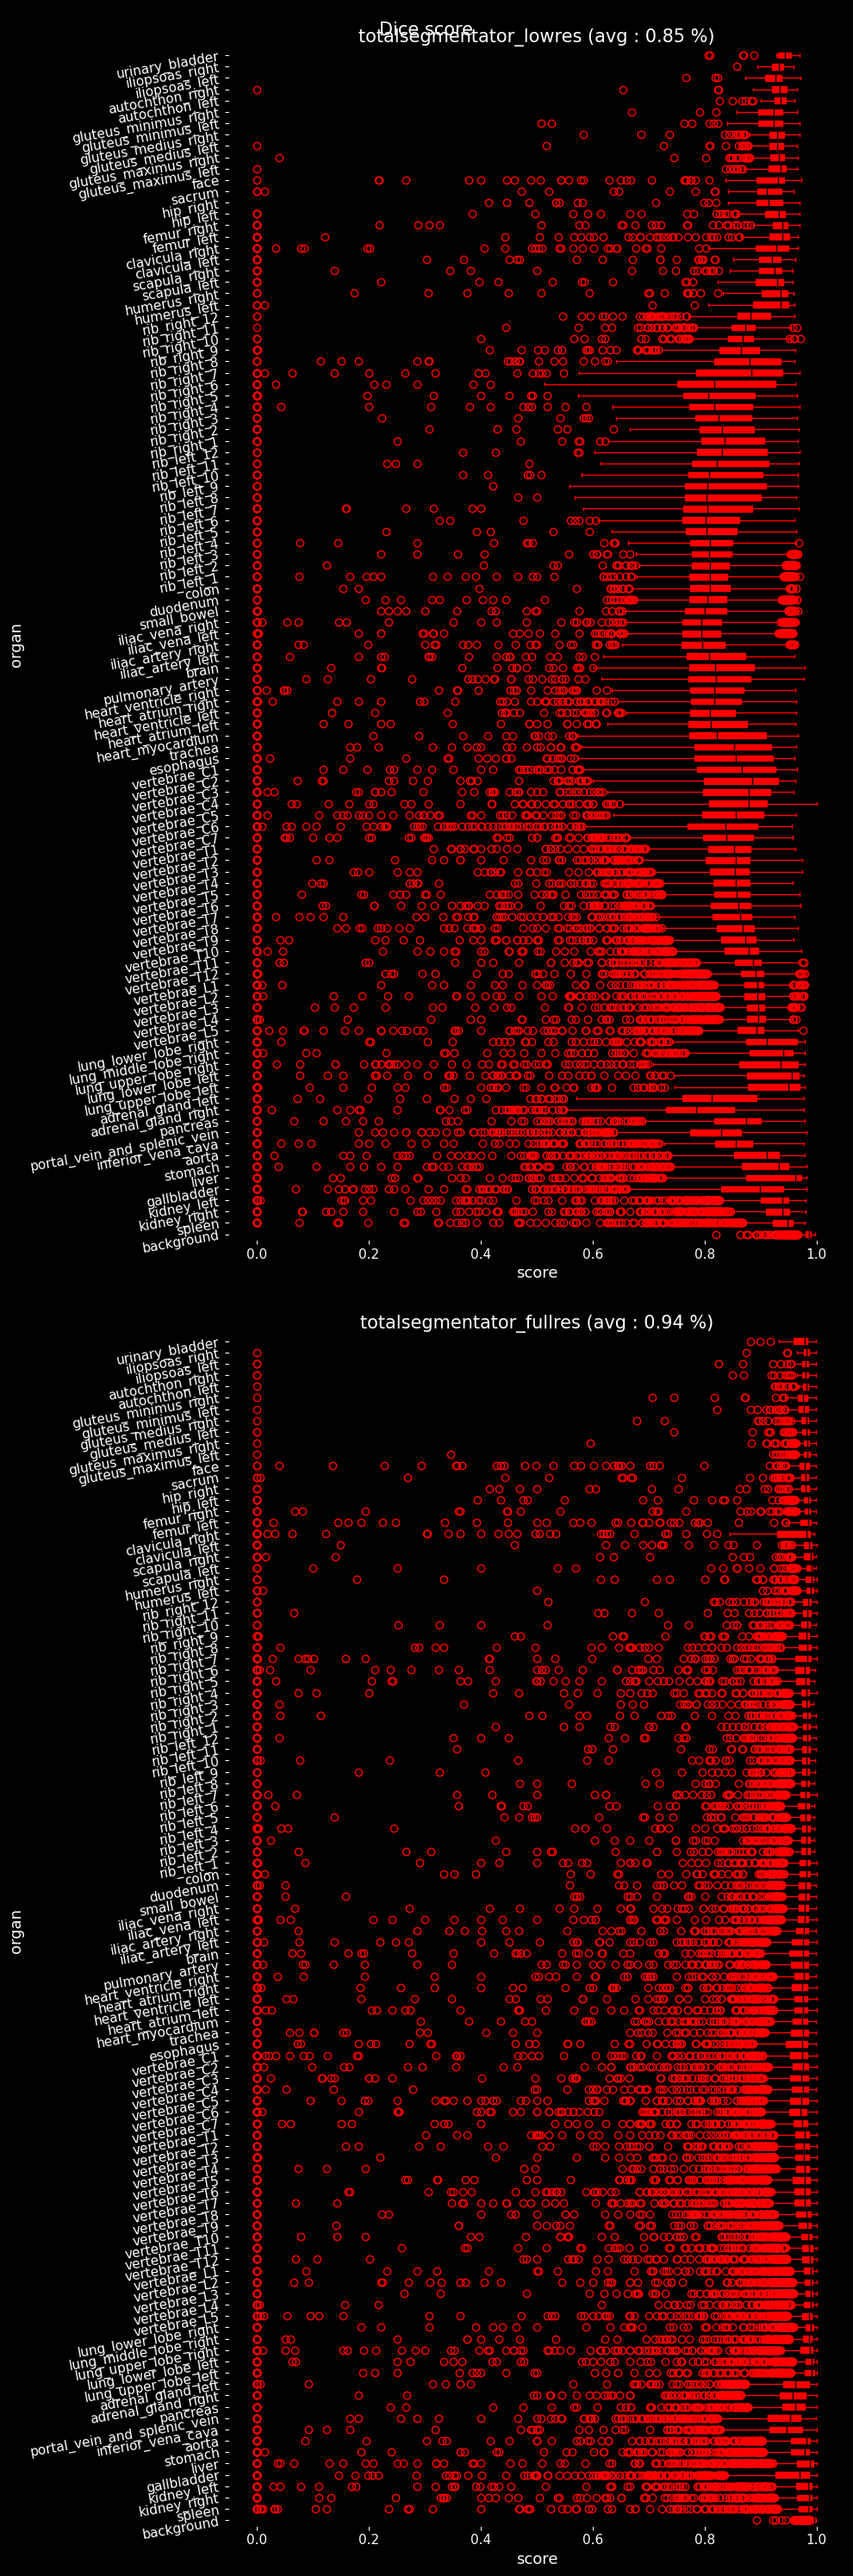

In [2]:
def compute_confusion_matrix(y_true, y_pred, labels):
    y_true = transform_mask(y_true, 'dense', is_one_hot = len(y_true.shape) == 4)
    y_pred = transform_mask(y_pred, 'dense', is_one_hot = len(y_pred.shape) == 4)
    
    if hasattr(y_true, 'numpy'): y_true = y_true.numpy()
    if hasattr(y_pred, 'numpy'): y_pred = y_pred.numpy()

    cm = multilabel_confusion_matrix(y_true.reshape([-1]), y_pred.reshape([-1]))
    return {
        label : {
            'tp' : cm[i, 1, 1], 'fp' : cm[i, 0, 1], 'fn' : cm[i, 1, 0], 'tn' : cm[i, 0, 0] 
        } for i, label in enumerate(labels) if i < len(cm)
    }

def compute_metrics(metrics, metric_name, ids = None):
    results = {}
    for subj_id, infos in metrics.items():
        if ids and subj_id not in ids: continue
        for c, cm in infos.items():
            if c in (None, 'null'): c = 'background'
            results.setdefault(c, []).append(_metrics_methods[metric_name](** cm))
    
    return {c : [vi for vi in v if vi is not None] for c, v in results.items()}

def dice_coeff(tp, fp, fn, tn):
    if tp + fn + fp == 0: return None
    inter = tp
    union = 2 * tp + fp + fn
    return 2. * inter / max(1, union)

_metrics_methods = {
    'dice' : dice_coeff
}

importlib.reload(plot_utils)

samples   = dataset
overwrite = False

all_results = {}
for model in models:
    results_file = os.path.join('evaluations', model, 'results.json')
    results = load_json(results_file, default = {}) if not overwrite else {}

    for idx, row in tqdm(samples.iterrows(), total = len(samples)):
        subject = row['images'].split('/')[-2]
        if subject in results: continue
        
        true, _ = load_medical_seg(row['segmentation'], mask_labels = row['label'], mapping = TOTALSEGMENTATOR_LABELS)
        pred, _ = load_medical_seg(os.path.join('evaluations', model, 'segmentations', '{}.nii.gz'.format(subject)))
        if pred.dtype in (np.float32, np.float64): pred = pred.astype(np.int32)
        
        #plot_volume(true, strides = 3)
        #plot_volume(pred, strides = 3)
            
        results[subject] = compute_confusion_matrix(true, pred, labels = TOTALSEGMENTATOR_LABELS)
        
        dump_json(results_file, results, indent = 4)
    
    all_results[model] = results

formatted = {
    k : compute_metrics(v, 'dice') for k, v in all_results.items()
}

formatted = {
    '\n{} (avg : {:.2f} %)'.format(k, np.mean([np.mean(vi) for vi in v.values()])) : {'x' : v}
    for k, v in formatted.items()
}
plot_utils.plot_multiple(
    ** formatted,
    plot_type = 'boxplot', ncols = 1, x_size = 10, y_size = 15, ytick_rotation = 10, vert = False,
    xlabel = 'score', ylabel = 'organ', title = 'Dice score', use_subplots = True
)